In [1]:
import pandas as pd
data =pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [2]:
print(train.info())
target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
MS Zoning          1460 non-null object
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Street             1460 non-null object
Alley              109 non-null object
Lot Shape          1460 non-null object
Land Contour       1460 non-null object
Utilities          1460 non-null object
Lot Config         1460 non-null object
Land Slope         1460 non-null object
Neighborhood       1460 non-null object
Condition 1        1460 non-null object
Condition 2        1460 non-null object
Bldg Type          1460 non-null object
House Style        1460 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Roof Style         14

In [3]:
import matplotlib.pyplot as plt

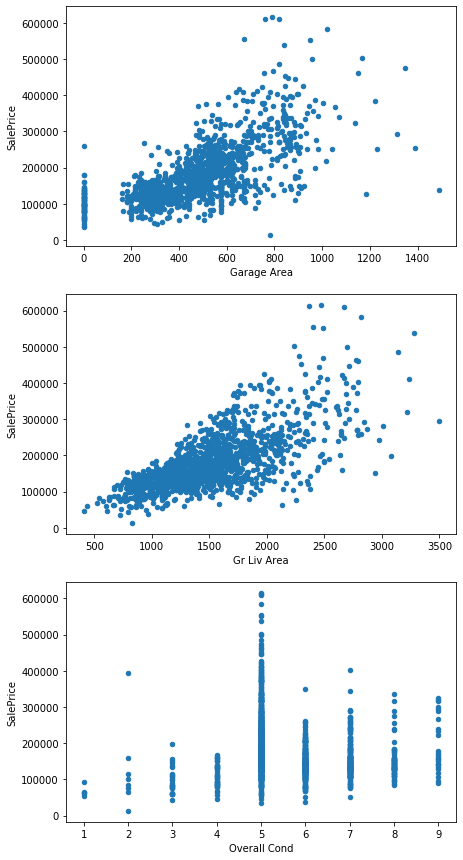

In [4]:
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

In [5]:
print(train[['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']].corr())

              Garage Area  Gr Liv Area  Overall Cond  SalePrice
Garage Area      1.000000     0.465366     -0.132401   0.662397
Gr Liv Area      0.465366     1.000000     -0.133710   0.698990
Overall Cond    -0.132401    -0.133710      1.000000  -0.099395
SalePrice        0.662397     0.698990     -0.099395   1.000000


## Question1:

1. Import and instantiate a linear regression model.
2. Fit a linear regression model that uses the feature and target columns we explored in the last 2 screens. Use the default arguments.
3. Display the coefficient and intercept of the fitted model using the coef_ and intercept_ attributes.
4. Assign  to a1 and  to a0.

In [6]:
#solution
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[116.86624683]
5366.821710056014


### Question 2
1. Use the fitted model to make predictions on both the training and test sets.
2. Calculate the RMSE value for the predictions on the training set and assign to train_rmse.
3. Calculate the RMSE value for the predictions on the test set and assign to test_rmse.

### Making predictions

In [7]:
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
from sklearn.metrics import mean_squared_error

In [8]:
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

In [9]:
train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

In [10]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

In [11]:
print(train_rmse)
print(test_rmse)

56034.3620014128
57088.25161263909


### Question 3

1. Train a linear regression model using the columns in cols.
2. Use the fitted model to make predictions on both the training and test dataset.
3. Calculate the RMSE value for the predictions on the training set and assign to train_rmse_2.
4. Calculate the RMSE value for the predictions on the test set and assign to test_rmse_2.

In [12]:
## Solution

cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

In [13]:
train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

In [14]:
print(train_rmse_2)
print(test_rmse_2)

56032.39801525867
57066.90779448559


## Dealing with missing values

In [16]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [19]:
train.head(2)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  

[2 rows x 82 columns]

In [21]:

numerical_train = train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1)
null_series = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]

In [22]:
print(full_cols_series)

Order              0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars        0
Garage Area        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch 

### Question 4

1. Compute the pairwise correlation coefficients between all of the columns in train_subset.
2. Select just the SalePrice column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values, and assign to sorted_corrs.

In [23]:
## Solution
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


In [24]:
## This shows us how the feature columns correlate with the target column (Salesprice)

### Question 5

1. Select only the columns in sorted_corrs with a correlation above 0.3 and assign to strong_corrs.
2. Filter train_subset using the indexes of strong_corrs and store the correlations to corrmat.
3. Use the seaborn.heatmap() function to generate a correlation matrix heatmap for the columns in strong_corrs.

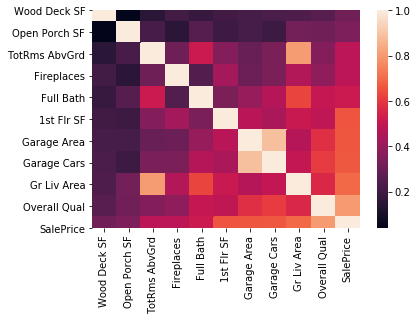

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = train_subset[strong_corrs.index].corr()
sns.heatmap(corrmat)

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

Gr Liv Area and TotRms AbvGrd

Garage Area and Garage Cars

In [26]:
## To confirm that the test set contains no missing values

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
print(test[final_corr_cols.index].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.5 KB
None


Looks like the test set has one pesky row with a missing value for Garage Area. Let's just drop this row for now. Finally, let's train and test a model using these columns to see how they fare.

### Question 6

1. Filter the test data frame so it only contains the columns from final_corr_cols.index. Then, drop the row containing missing values and assign the result to clean_test
2. Build a linear regression model using the features in features.
3. Calculate the RMSE on the test and train sets.
4. Assign the train RMSE to train_rmse and the test RMSE to test_rmse

In [27]:
## Solution

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'
clean_test = test[final_corr_cols.index].dropna()

In [28]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [30]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [31]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

### Notes:

The last technique we'll explore is removing features with low variance. When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of 0. This would mean that all of the values in that column were exactly the same. This means that the column isn't informative and isn't going to help the model make better predictions.

Here is the formula for rescaling: x - min(x) / max(x) - min(x)

where:
x = is the individual value
min(x) = is the minimum value for the column x belongs to
max(x) = is the maximum value for the column x belongs to

### Question 7

1. Select the columns in features from the train data frame. Rescale each of the columns so the values range from 0 to 1, by using train[features] instead of  in the formula above. Assign the result to unit_train.
2. Calculate and display the column minimum and maximum values of unit_train to ensure that all values range from 0 to 1.

In [32]:
## Solution

unit_train = (train[features] - train[features].min())/(train[features].max() - train[features].min())
print(unit_train.min())
print(unit_train.max())

Wood Deck SF     0.0
Open Porch SF    0.0
Fireplaces       0.0
Full Bath        0.0
1st Flr SF       0.0
Garage Area      0.0
Gr Liv Area      0.0
Overall Qual     0.0
dtype: float64
Wood Deck SF     1.0
Open Porch SF    1.0
Fireplaces       1.0
Full Bath        1.0
1st Flr SF       1.0
Garage Area      1.0
Gr Liv Area      1.0
Overall Qual     1.0
dtype: float64


### Question 8

1. Drop Open Porch SF from features.
2. Build a linear regression model using the remaining features.
3. Calculate the RMSE on the test and train sets.
4. Use clean_test defined in the code editor for you.
5. Assign the train RMSE to train_rmse_2 and the test RMSE to test_rmse_2.
6. Display both RMSE values using the print() function.

In [33]:
clean_test = test[final_corr_cols.index].dropna()
features = features.drop('Open Porch SF')

In [34]:
lr = LinearRegression()
lr.fit(train[features], train['SalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
train_predictions = lr.predict(train[features])
test_predictions = lr.predict(clean_test[features])

In [36]:
train_mse = mean_squared_error(train_predictions, train[target])
test_mse = mean_squared_error(test_predictions, clean_test[target])

In [37]:
train_rmse_2 = np.sqrt(train_mse)
test_rmse_2 = np.sqrt(test_mse)

In [38]:
print(train_rmse_2)
print(test_rmse_2)

34372.69670778396
40591.42702437725


## Conclusion

We were able to improve the RMSE value to approximately 40591 by removing the Open Porch SF feature. This is most likely the furthest we can go without transforming and utilizing the other features in the dataset so we'll stop here for now.